<a href="https://colab.research.google.com/github/Virajkd/Lab1/blob/main/Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  import pandas as pd
  import numpy as np
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_squared_error, r2_score

In [11]:
datapath='/content/VSP - Java.xlsx'
df=pd.read_excel(datapath)
Xi=df[['Header_and_Main_declaration']]
X=df[['Header_and_Main_declaration','Incomprehensible_Code','Comprehensible_code_with_logical_errors','Comprehensible_code_with_syntax_errors']]
y=df[['Final_Marks']]

Xi_train, Xi_test, y_train, y_test = train_test_split(Xi,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(Xi_train,y_train)
y_test_pred=model.predict(Xi_test)
y_train_pred=model.predict(Xi_train)

In [12]:
def stats(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    epsilon = 1e-10
    mape = np.mean(np.abs((y_test - y_pred) / (y_test + epsilon))) * 100

    r2 = r2_score(y_test, y_pred)

    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('R-squared:', r2)
    print('MAPE:', mape, '\n')


stats(y_test, y_test_pred)
stats(y_train, y_train_pred)


Mean Squared Error: 4.982023339509915
Root Mean Squared Error: 2.2320446544614456
R-squared: 0.1692724377800483
MAPE: 60.59254441768553 

Mean Squared Error: 4.833330383491664
Root Mean Squared Error: 2.198483655497958
R-squared: 0.17175661470224413
MAPE: 5019503822.551823 



In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)

stats(y_test,y_test_pred)
stats(y_train,y_train_pred)

Mean Squared Error: 0.2811857307150743
Root Mean Squared Error: 0.530269488764981
R-squared: 0.9531136807899925
MAPE: 8.394026508215992 

Mean Squared Error: 0.36129070786407336
Root Mean Squared Error: 0.6010746275331154
R-squared: 0.9380889334650055
MAPE: 346718741.70419884 



In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_train)
kmeans.labels_
kmeans.cluster_centers_

array([[1.86046512, 1.85465116, 1.24563953, 1.32412791],
       [1.48148148, 0.73063973, 0.37037037, 0.17171717]])

In [20]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train)
print(silhouette_score(X_train, kmeans.labels_))
print(calinski_harabasz_score(X_train, kmeans.labels_))
print(davies_bouldin_score(X_train, kmeans.labels_))



0.37991732786159493
568.9974548590429
1.1454148554084094


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

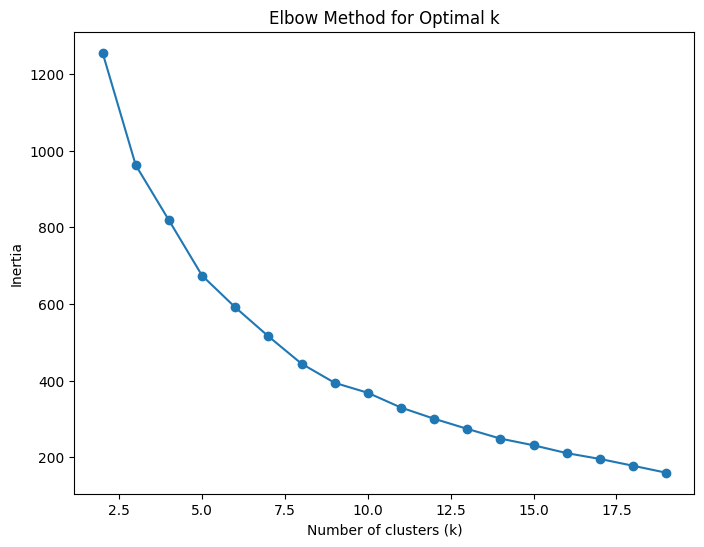

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

In [27]:
distortions = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 20), distortions, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
plt.figure(figsize=(5, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

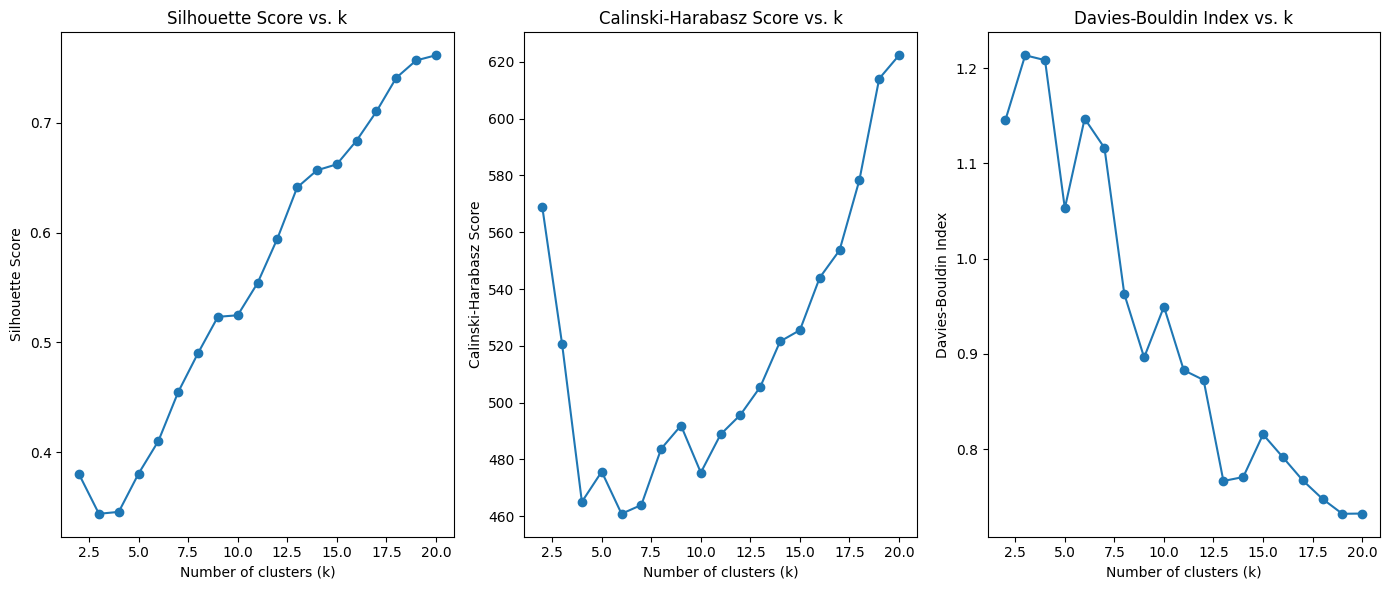

In [23]:
import matplotlib.pyplot as plt
import numpy as np

k_range = range(2, 21)  # You can adjust this range as needed

silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train)
    labels = kmeans.labels_

    silhouette_avg = silhouette_score(X_train, labels)
    calinski_harabasz_avg = calinski_harabasz_score(X_train, labels)
    davies_bouldin_avg = davies_bouldin_score(X_train, labels)

    silhouette_scores.append(silhouette_avg)
    calinski_harabasz_scores.append(calinski_harabasz_avg)
    davies_bouldin_scores.append(davies_bouldin_avg)

# Plot the scores
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. k')

plt.subplot(1, 3, 2)
plt.plot(k_range, calinski_harabasz_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score vs. k')

plt.subplot(1, 3, 3)
plt.plot(k_range, davies_bouldin_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs. k')

plt.tight_layout()
plt.show()
